In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('covid.csv')

In [3]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Maharashtra,"81,70,24113",1061,"80,21,57912","1,48,556",0.00%,98.18%,1.82%
1,Kerala,"69,07,1283","10,076","68,34,1759",71946,0.01%,98.94%,1.04%
2,Karnataka,"40,88,7102",181,"40,48,3351",40357,0.00%,99.01%,0.99%
3,Tamil Nadu,"36,10,6313",32,"35,72,5475",38081,0.00%,98.95%,1.05%
4,Andhra Pradesh,"23,40,674",1,"23,25,9411",14733,0%,99.37%,0.63%


In [4]:
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
31,Nagaland,36032,0,35250,782,0%,97.83%,2.17%
32,Ladakh,29587,0,29356,231,0%,99.22%,0.78%
33,Dadra and Nagar Haveli and Daman and Diu,11592,0,11588,4,0%,99.97%,0.03%
34,Lakshadweep,11415,0,11363,52,0%,99.54%,0.46%
35,Andaman and Nicobar,10766,0,10637,129,0%,98.80%,1.20%


In [25]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Cases,36.0,3.511317e+07,1.391092e+08,10766.00,168166.5000,955806.500,8063266.00,8.170241e+08
Active,36.0,7.606389e+02,2.613372e+03,0.00,0.0000,1.000,69.00,1.229100e+04
Discharged,36.0,3.426037e+07,1.367190e+08,10637.00,128288.2500,806673.000,2784311.25,8.021579e+08
Deaths,36.0,1.477550e+04,2.721502e+04,4.00,1124.0000,6551.000,14325.75,1.485560e+05
Active Ratio,36.0,6.388889e-03,2.576296e-02,0.00,0.0000,0.000,0.00,1.500000e-01
Discharge Ratio,36.0,9.889500e+01,5.064414e-01,97.41,98.6875,98.930,99.16,9.997000e+01
Death Ratio,36.0,1.097500e+00,4.947806e-01,0.03,0.8400,1.065,1.31,2.440000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State/UTs        36 non-null     object
 1   Total Cases      36 non-null     object
 2   Active           36 non-null     object
 3   Discharged       36 non-null     object
 4   Deaths           36 non-null     object
 5   Active Ratio     36 non-null     object
 6   Discharge Ratio  36 non-null     object
 7   Death Ratio      36 non-null     object
dtypes: object(8)
memory usage: 2.4+ KB


In [6]:
df.shape

(36, 8)

In [7]:
df['Total Cases'] = df['Total Cases'].str.replace(',', '') 
df['Active'] = df['Active'].str.replace(',', '')
df['Discharged'] = df['Discharged'].str.replace(',', '')
df['Deaths'] = df['Deaths'].str.replace(',', '')

In [8]:
df['Total Cases'] = df['Total Cases'].astype(int)
df['Active'] = df['Active'].astype(int)
df['Discharged'] = df['Discharged'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State/UTs        36 non-null     object
 1   Total Cases      36 non-null     int32 
 2   Active           36 non-null     int32 
 3   Discharged       36 non-null     int32 
 4   Deaths           36 non-null     int32 
 5   Active Ratio     36 non-null     object
 6   Discharge Ratio  36 non-null     object
 7   Death Ratio      36 non-null     object
dtypes: int32(4), object(4)
memory usage: 1.8+ KB


In [10]:
df['Active Ratio'] = df['Active Ratio'].str.replace('%', '')
df['Discharge Ratio'] = df['Discharge Ratio'].str.replace('%', '')
df['Death Ratio'] = df['Death Ratio'].str.replace('%', '')

In [11]:
df['Active Ratio'] = df['Active Ratio'].astype(float)
df['Discharge Ratio'] = df['Discharge Ratio'].astype(float)
df['Death Ratio'] = df['Death Ratio'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int32  
 2   Active           36 non-null     int32  
 3   Discharged       36 non-null     int32  
 4   Deaths           36 non-null     int32  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
dtypes: float64(3), int32(4), object(1)
memory usage: 1.8+ KB


In [13]:
df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio'],
      dtype='object')

In [16]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Maharashtra,817024113,1061,802157912,148556,0.00,98.18,1.82
1,Kerala,69071283,10076,68341759,71946,0.01,98.94,1.04
2,Karnataka,40887102,181,40483351,40357,0.00,99.01,0.99
3,Tamil Nadu,36106313,32,35725475,38081,0.00,98.95,1.05
4,Andhra Pradesh,2340674,1,23259411,14733,0.00,99.37,0.63


In [17]:
Total_cases_india=df['Total Cases'].sum()
print("Total Cases in India:",Total_cases_india)
Total_Active_Cases=df['Active'].sum()
print("Total_Active_Cases:",Total_Active_Cases)
Total_Discharged_Persons=df['Discharged'].sum()
print("Total_Discharged_Persons:",Total_Discharged_Persons)
Total_Deaths=df['Deaths'].sum()
print("Total_Deaths:",Total_Deaths)

Total Cases in India: 1264074038
Total_Active_Cases: 27383
Total_Discharged_Persons: 1233373151
Total_Deaths: 531918


In [18]:
max_case = df["Total Cases"].max()
highest_case = df[df["Total Cases"] == max_case][["State/UTs", "Total Cases"]]
print(highest_case)


     State/UTs  Total Cases
0  Maharashtra    817024113


In [19]:
min_case = df["Total Cases"].min()
lowest_case = df[df["Total Cases"] == min_case][["State/UTs", "Total Cases"]]
print(lowest_case)

              State/UTs  Total Cases
35  Andaman and Nicobar        10766


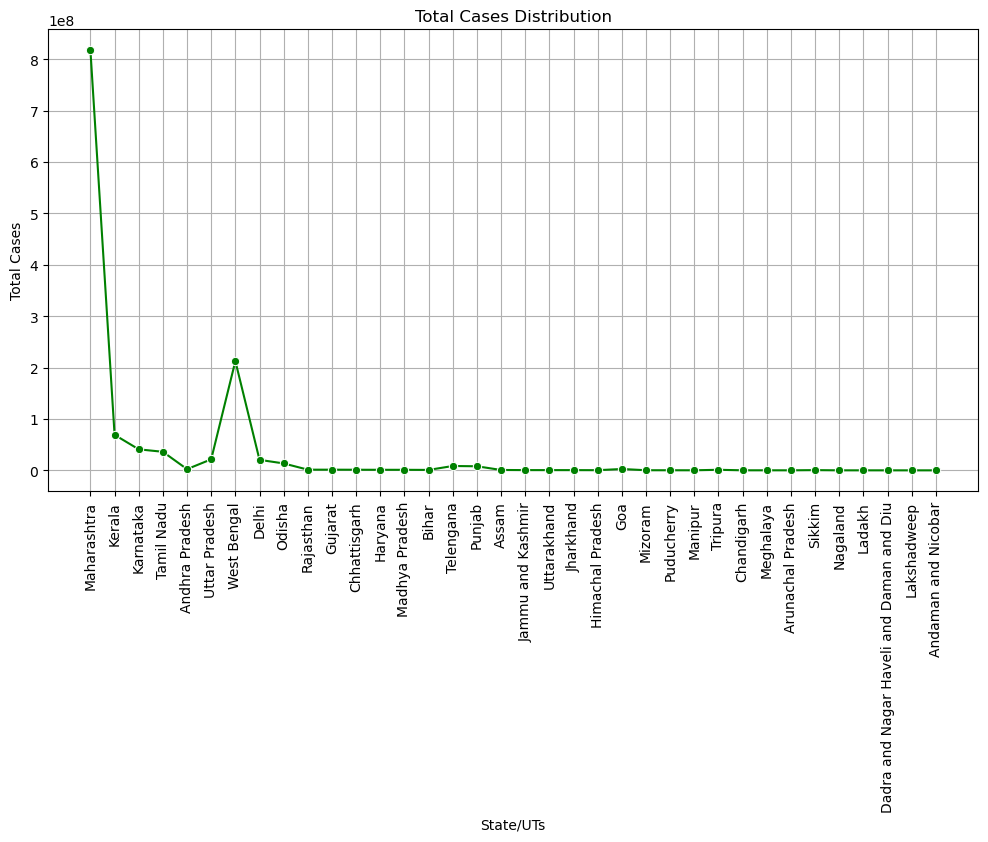

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="State/UTs", y="Total Cases", marker="o", linestyle="-", color="green")
plt.xticks(rotation=90)
plt.xlabel("State/UTs")
plt.ylabel("Total Cases")
plt.grid(True)
plt.title("Total Cases Distribution")
plt.show()

In [21]:
max_ratio = df["Death Ratio"].max()
highest_ratio = df[df["Death Ratio"] == max_ratio][["State/UTs", "Death Ratio"]]
print(highest_ratio)


   State/UTs  Death Ratio
16    Punjab         2.44


In [22]:
min_ratio = df["Death Ratio"].min()
lowest_ratio = df[df["Death Ratio"] == min_ratio][["State/UTs", "Death Ratio"]]
print(lowest_ratio)

                                   State/UTs  Death Ratio
33  Dadra and Nagar Haveli and Daman and Diu         0.03


C:\Users\Asus\AppData\Local\Temp\ipykernel_2848\2269558005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="State/UTs",y="Death Ratio", palette="viridis")


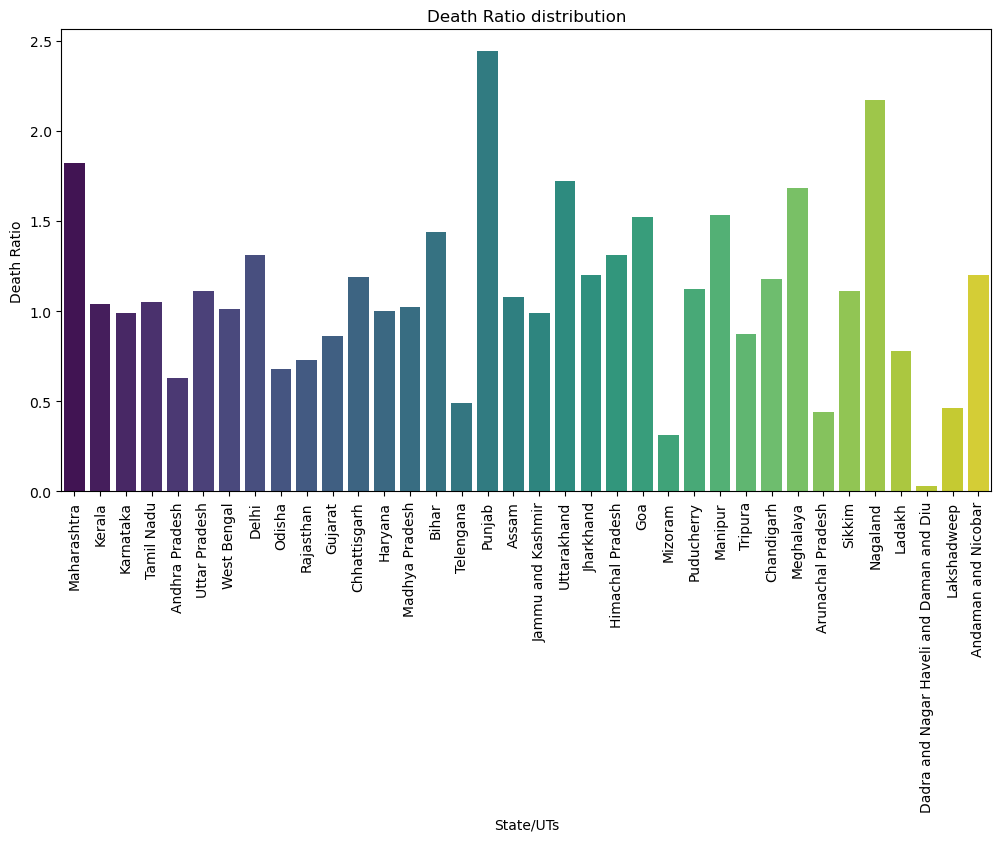

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x="State/UTs",y="Death Ratio", palette="viridis")
plt.ylabel("Death Ratio")
plt.xlabel("State/UTs")
plt.title("Death Ratio distribution")
plt.xticks(rotation=90)
plt.show()

In [28]:
trr = (df['Discharged'].sum() / df['Total Cases'].sum()) * 100
tdr = (df['Deaths'].sum() / df['Total Cases'].sum()) * 100
print(f"Overall Recovery Rate: {trr:.2f}%")
print(f"Overall Death Rate: {tdr:.2f}%")

Overall Recovery Rate: 97.57%
Overall Death Rate: 0.04%


In [29]:
top_states = df[['State/UTs', 'Active']].sort_values(by='Active', ascending=False).head(5)
print("Top 5 States with Most Active Cases:\n", top_states)

Top 5 States with Most Active Cases:
         State/UTs  Active
16         Punjab   12291
1          Kerala   10076
6     West Bengal    2353
0     Maharashtra    1061
5   Uttar Pradesh     601


C:\Users\Asus\AppData\Local\Temp\ipykernel_2848\1168959849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states["State/UTs"], y=top_states["Active"], palette="Reds_r")


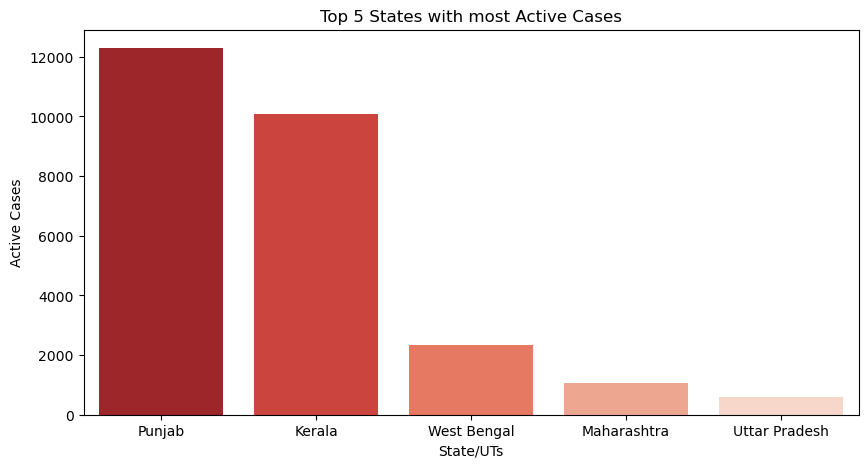

In [31]:
top_states = df[['State/UTs', 'Active']].sort_values(by='Active', ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states["State/UTs"], y=top_states["Active"], palette="Reds_r")
plt.xlabel("State/UTs")
plt.ylabel("Active Cases")
plt.title("Top 5 States with most Active Cases")
plt.show()

In [32]:
top_ds = df[["State/UTs", "Deaths"]].sort_values(by='Deaths', ascending=False).head(5)
print("Top 5 States with Highest Deaths:\n", top_ds)

Top 5 States with Highest Deaths:
      State/UTs  Deaths
0  Maharashtra  148556
1       Kerala   71946
2    Karnataka   40357
3   Tamil Nadu   38081
7        Delhi   26665


C:\Users\Asus\AppData\Local\Temp\ipykernel_2848\3987667354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ds["State/UTs"], y=top_ds["Deaths"], palette="Purples")


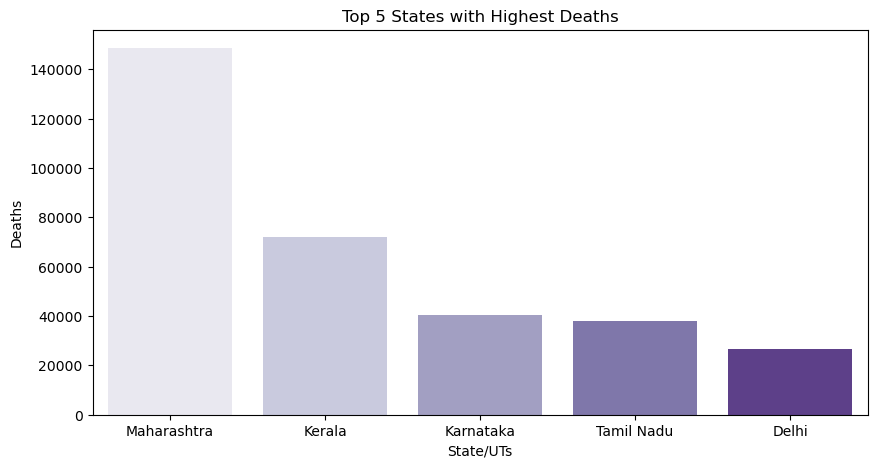

In [35]:
top_ds = df[["State/UTs", "Deaths"]].sort_values(by='Deaths', ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ds["State/UTs"], y=top_ds["Deaths"], palette="Purples")
plt.xlabel("State/UTs")
plt.ylabel("Deaths")
plt.title("Top 5 States with Highest Deaths")
plt.show()

In [36]:
max_ratio = df["Discharge Ratio"].max()
highest_ratio = df[df["Discharge Ratio"] == max_ratio][["State/UTs", "Discharge Ratio"]]
print(highest_ratio)

                                   State/UTs  Discharge Ratio
33  Dadra and Nagar Haveli and Daman and Diu            99.97


In [37]:
min_ratio = df["Discharge Ratio"].min()
lowest_ratio = df[df["Discharge Ratio"] == min_ratio][["State/UTs", "Discharge Ratio"]]
print(lowest_ratio)

   State/UTs  Discharge Ratio
16    Punjab            97.41


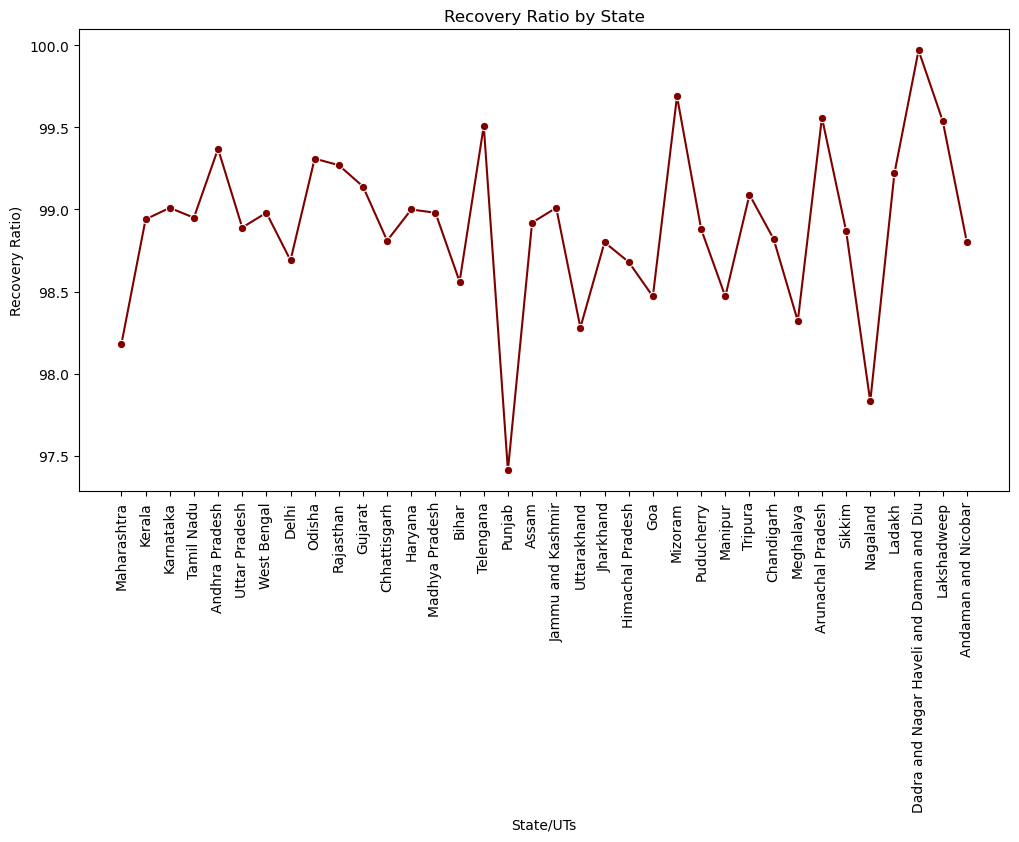

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x="State/UTs", y="Discharge Ratio", marker="o",color="maroon")
plt.xticks(rotation=90)
plt.xlabel("State/UTs")
plt.ylabel("Recovery Ratio)")
plt.title("Recovery Ratio by State")
plt.show()